# 영화 추천 서비스

<br>

https://www.kaggle.com/rounakbanik/the-movies-dataset

In [ ]:
import pandas as pd
import numpy

In [ ]:
movies = pd.read_csv('data/movies.csv') # 영화 제목
ratings = pd.read_csv('data/ratings_small.csv') # 영화에 대한 사용자별 별점 정보

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
# 별점 분포
ratings.rating.describe()

count    100004.000000
mean          3.543608
std           1.058064
min           0.500000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

<br>

## 비슷한 영화 취향의 사용자 기반 영화 추천

#### 코사인 유사도
- 사용자 간의 코사인 유사도

In [ ]:
df = pd.merge(ratings, movies, on='movieId')
df_matrix_user = df.pivot_table(index='userId', columns='title', values='rating')

In [ ]:
# 결측치 0으로 채움
df_matrix_user.fillna(0, inplace=True)

In [ ]:
# 코사인 유사도
from sklearn.metrics.pairwise import cosine_similarity
user_based = cosine_similarity(df_matrix_user)

In [ ]:
# 데이터프레임화
user_based = pd.DataFrame(data=user_based, index=df_matrix_user.index, columns=df_matrix_user.index)
user_based.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.000000,0.000000,0.074482,0.016818,0.000000,0.083884,0.000000,0.012843,0.000000,...,0.000000,0.000000,0.014574,0.043719,0.000000,0.000000,0.000000,0.062917,0.000000,0.017466
2,0.000000,1.000000,0.124295,0.118821,0.103646,0.000000,0.212985,0.113190,0.113333,0.043213,...,0.477306,0.116373,0.078284,0.164162,0.466281,0.425462,0.084646,0.024140,0.170595,0.113175
3,0.000000,0.124295,1.000000,0.081640,0.151531,0.060691,0.154714,0.249781,0.134475,0.114672,...,0.161205,0.118207,0.177356,0.158357,0.177098,0.124562,0.124911,0.080984,0.136606,0.170193
4,0.074482,0.118821,0.081640,1.000000,0.130649,0.079648,0.319745,0.191013,0.030417,0.137186,...,0.114319,0.086959,0.137527,0.254030,0.121905,0.088735,0.068483,0.104309,0.054512,0.211609
5,0.016818,0.103646,0.151531,0.130649,1.000000,0.063796,0.095888,0.165712,0.086616,0.032370,...,0.191029,0.038929,0.147187,0.224245,0.139721,0.058252,0.042926,0.038358,0.062642,0.225086


<br>

- 사용자 별점 기준 영화간의 코사인 유사도

In [ ]:
df = pd.merge(ratings, movies, on='movieId')
df_matrix_movie = df.pivot_table(index='title', columns='userId', values='rating')

In [ ]:
# 결측치 0으로 채움
df_matrix_movie.fillna(0, inplace=True)

In [ ]:
# 코사인 유사도
movie_based = cosine_similarity(df_matrix_movie)

In [ ]:
movie_based = pd.DataFrame(data=movie_based, index=df_matrix_movie.index, columns=df_matrix_movie.index)
movie_based.head()

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,"Zorro, the Gay Blade (1981)",Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
"""Great Performances"" Cats (1998)",1.000000,0.0,0.0,0.164399,0.020391,0.0,0.014046,0.000000,0.0,0.003166,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
$9.99 (2008),0.000000,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.079474,0.0,0.156330,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.013899,0.0,0.058218,0.0
'Hellboy': The Seeds of Creation (2004),0.000000,0.0,1.0,0.000000,0.000000,1.0,0.000000,0.217357,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
'Neath the Arizona Skies (1934),0.164399,0.0,0.0,1.000000,0.124035,0.0,0.085436,0.000000,0.0,0.019259,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
'Round Midnight (1986),0.020391,0.0,0.0,0.124035,1.000000,0.0,0.010597,0.143786,0.0,0.136163,...,0.0,0.0,0.0,0.0,0.121567,0.0,0.000000,0.0,0.000000,0.0


#### 사용자간 코사인 유사도 이용하여 영화 추천

In [ ]:
# 비슷한 평점을 매긴 사용자 상위 n명
def get_similar_users(user, n):
    return user_based[user].sort_values(ascending=False)[:n]

In [ ]:
get_similar_users(18, 4) # 자기 자신 포함

userId
18     1.000000
70     0.660646
284    0.643825
256    0.640314
Name: 18, dtype: float64

In [ ]:
# 사용자간의 별점 비교와 정렬을 위해 reset index
df_matrix_movie_2 = df_matrix_movie.reset_index()
df_matrix_movie_2.head()

userId,title,1,2,3,4,5,6,7,8,9,...,662,663,664,665,666,667,668,669,670,671
0,"""Great Performances"" Cats (1998)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,$9.99 (2008),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,'Neath the Arizona Skies (1934),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 사용자1의 평점 높은 영화 5개
df_matrix_movie_2[['title', 1]].sort_values(1, ascending=False).head() 

userId,title,1
1593,Cinema Paradiso (Nuovo cinema Paradiso) (1989),4.0
8056,Tron (1982),4.0
2926,"French Connection, The (1971)",4.0
2275,Dracula (Bram Stoker's Dracula) (1992),3.5
7090,Sleepers (1996),3.0


In [ ]:
# 추천을 원하는 사용자가 안 본 영화
df_matrix_movie_2[df_matrix_movie_2[1]==0][['title', 1]].head()

userId,title,1
0,"""Great Performances"" Cats (1998)",0.0
1,$9.99 (2008),0.0
2,'Hellboy': The Seeds of Creation (2004),0.0
3,'Neath the Arizona Skies (1934),0.0
4,'Round Midnight (1986),0.0


In [ ]:
# 사용자가 이미 본 영화 제거
def del_watched_movie(user, n):
  # user 추천을 원하는 사용자 / n 유사도가 높은 사용자
  return df_matrix_movie_2[df_matrix_movie_2[user]==0][['title', user, n]]

In [ ]:
del_watched_movie(1, 2).sort_values(2, ascending=False).head()

userId,title,1,2
6847,Sense and Sensibility (1995),0.0,5.0
1663,Clueless (1995),0.0,5.0
1163,"Brady Bunch Movie, The (1995)",0.0,5.0
1922,Dances with Wolves (1990),0.0,5.0
7687,Terminator 2: Judgment Day (1991),0.0,5.0


In [ ]:
def recommend_movie_by_user(user):
    
    # 자기 자신 제외 유사도 높은 사용자
    users = get_similar_users(user, 4).index[1:4] 
    
    rcmd_movies = []
    for i in users:
        # print(i)
        movie_list = list(del_watched_movie(user, i).sort_values(i, ascending=False).title[:5])
        # print(movie_list)
        rcmd_movies.append(movie_list)

    return rcmd_movies

In [ ]:
recommend_movie_by_user(3)

[['Green Mile, The (1999)',
  'Pianist, The (2002)',
  'Donnie Darko (2001)',
  'Big Lebowski, The (1998)',
  'Lives of Others, The (Das leben der Anderen) (2006)'],
 ['Lion King, The (1994)',
  'Toy Story (1995)',
  'Star Wars: Episode IV - A New Hope (1977)',
  'Shrek (2001)',
  'Incredibles, The (2004)'],
 ['Crimson Tide (1995)',
  'Rob Roy (1995)',
  'Jurassic Park (1993)',
  'Clear and Present Danger (1994)',
  'Outbreak (1995)']]

In [ ]:
user_num = int(input('추천을 원하는 사용자 번호를 입력하세요: '))
recommend_movie_by_user(user_num)

추천을 원하는 사용자 번호를 입력하세요: 5


[['Shawshank Redemption, The (1994)',
  'Ice Age (2002)',
  'Seabiscuit (2003)',
  'Prince of Egypt, The (1998)',
  "Schindler's List (1993)"],
 ['Kiss Kiss Bang Bang (2005)',
  'Pride and Prejudice (1995)',
  'Life Is Beautiful (La Vita è bella) (1997)',
  'Wedding Date, The (2005)',
  'Accepted (2006)'],
 ['To Kill a Mockingbird (1962)',
  'Sandlot, The (1993)',
  'Pulp Fiction (1994)',
  'Edward Scissorhands (1990)',
  'Usual Suspects, The (1995)']]

<br>

#### ++) 영화간 코사인 유사도 이용하여 영화 추천

In [ ]:
def recommend_movie_by_rating(title):
    return movie_based[title].sort_values(ascending=False)[:5]

In [ ]:
recommend_movie_by_rating('Godfather, The (1972)')

title
Godfather, The (1972)                     1.000000
Godfather: Part II, The (1974)            0.773685
Goodfellas (1990)                         0.620349
One Flew Over the Cuckoo's Nest (1975)    0.568244
American Beauty (1999)                    0.557997
Name: Godfather, The (1972), dtype: float64

<br>

## 줄거리 기반 영화 분석 및 추천

#### 데이터 전처리

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# 영화 줄거리, 평균 별점
movies_meta = pd.read_csv('data/movies_metadata.csv')
movies_meta.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [ ]:
movies_meta.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [ ]:
movies_meta = movies_meta[['imdb_id', 'original_title', 'original_language', 'overview', 'runtime', 'vote_average', 'production_companies']]
movies_meta.head(3)

,imdb_id,original_title,original_language,overview,runtime,vote_average,production_companies
0,tt0114709,Toy Story,en,"Led by Woody, Andy's toys live happily in his ...",81.0,7.7,"[{'name': 'Pixar Animation Studios', 'id': 3}]"
1,tt0113497,Jumanji,en,When siblings Judy and Peter discover an encha...,104.0,6.9,"[{'name': 'TriStar Pictures', 'id': 559}, {'na..."
2,tt0113228,Grumpier Old Men,en,A family wedding reignites the ancient feud be...,101.0,6.5,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'..."


In [ ]:
movies_meta.describe()

,runtime,vote_average
count,45203.000000,45460.000000
mean,94.128199,5.618207
std,38.407810,1.924216
min,0.000000,0.000000
25%,85.000000,5.000000
50%,95.000000,6.000000
75%,107.000000,6.800000
max,1256.000000,10.000000


In [ ]:
movies_meta.isna().sum() # 결측치 확인

imdb_id                  17
original_title            0
original_language        11
overview                954
runtime                 263
vote_average              6
production_companies      3
dtype: int64

In [ ]:
movies_meta = movies_meta.dropna()

- 평균 별점 분포

Text(0, 0.5, 'Ratings')

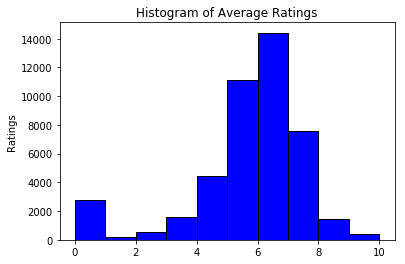

In [ ]:
# matplotlib histogram
plt.hist(movies_meta['vote_average'], color = 'blue', edgecolor = 'black')

# Add labels
plt.title('Histogram of Average Ratings')
plt.ylabel('Ratings')

- 러닝타임 분포 (이상치 제거 전)

Text(0, 0.5, 'Runtime (min)')

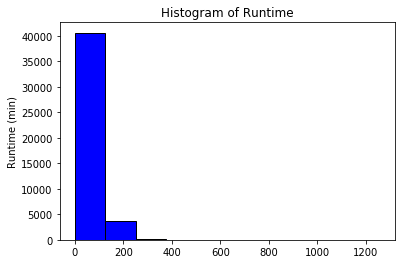

In [ ]:
# matplotlib histogram
plt.hist(movies_meta['runtime'], color = 'blue', edgecolor = 'black')

# Add labels
plt.title('Histogram of Runtime')
plt.ylabel('Runtime (min)')

- 러닝타임 분포 (이상치 제거 후)

In [ ]:
movies_meta[movies_meta.runtime == movies_meta.runtime.max()]

,imdb_id,original_title,original_language,overview,runtime,vote_average,production_companies
24178,tt0076993,Centennial,en,The economic and cultural growth of Colorado s...,1256.0,7.9,"[{'name': 'Universal Television', 'id': 26727}]"


In [ ]:
# remove outliers (+- 3 stdv from mean)
movies_df = movies_meta[np.abs(movies_meta.runtime-movies_meta.runtime.mean()) <= (3 * movies_meta.runtime.std())]
movies_df = movies_df.reset_index(drop = True)
movies_df.describe()

,runtime,vote_average
count,44172.000000,44172.000000
mean,93.381305,5.633664
std,29.448439,1.891831
min,0.000000,0.000000
25%,85.000000,5.000000
50%,95.000000,6.000000
75%,106.000000,6.800000
max,207.000000,10.000000


Text(0, 0.5, 'Runtime (min)')

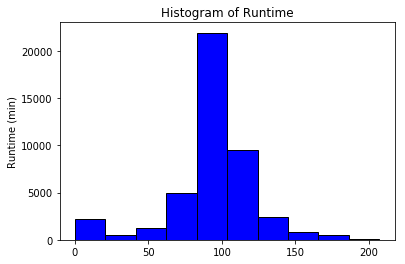

In [ ]:
# matplotlib histogram
plt.hist(movies_df['runtime'], color = 'blue', edgecolor = 'black')

# Add labels
plt.title('Histogram of Runtime')
plt.ylabel('Runtime (min)')

<br>

### 텍스트 데이터 분석

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import random

In [ ]:
corpus = movies_df.overview.tolist() # pd series to list

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', min_df=0.0005) # setting min_df (memory issue)

In [ ]:
tfidf = vectorizer.fit_transform(corpus).todense()

In [ ]:
tfidf_df = pd.DataFrame(tfidf)

In [ ]:
# ex to see if the model works
print("Similarity between", movies_df.original_title[0], "and", movies_df.original_title[1], " : ", cosine_similarity(tfidf[0], tfidf[1]))

Similarity between Toy Story and Jumanji  :  [[0.01893468]]


### 영화 추천

In [ ]:
movies_meta.head()

,imdb_id,original_title,original_language,overview,runtime,vote_average,production_companies
0,tt0114709,Toy Story,en,"Led by Woody, Andy's toys live happily in his ...",81.0,7.7,"[{'name': 'Pixar Animation Studios', 'id': 3}]"
1,tt0113497,Jumanji,en,When siblings Judy and Peter discover an encha...,104.0,6.9,"[{'name': 'TriStar Pictures', 'id': 559}, {'na..."
2,tt0113228,Grumpier Old Men,en,A family wedding reignites the ancient feud be...,101.0,6.5,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'..."
3,tt0114885,Waiting to Exhale,en,"Cheated on, mistreated and stepped on, the wom...",127.0,6.1,[{'name': 'Twentieth Century Fox Film Corporat...
4,tt0113041,Father of the Bride Part II,en,Just when George Banks has recovered from his ...,106.0,5.7,"[{'name': 'Sandollar Productions', 'id': 5842}..."


In [ ]:
dct = {}
for i in range (1, len(tfidf)):
    title = movies_df.original_title[i]
    dct[title] = cosine_similarity(tfidf[0], tfidf[i])

In [ ]:
sorted(dct.items(), key = lambda x: x[1], reverse = True)[:5] # t toystory 기준

[('Toy Story 3', array([[0.50568711]])),
 ('Toy Story 2', array([[0.44204639]])),
 ('The 40 Year Old Virgin', array([[0.37867561]])),
 ('The Champ', array([[0.34972492]])),
 ('Superstar: The Life and Times of Andy Warhol', array([[0.3371542]]))]

<br>

### 영화 소개 중 빈도수가 가장 높은 5개 단어 추출

In [ ]:
movies_meta.head()

,imdb_id,original_title,original_language,overview,runtime,vote_average,production_companies
0,tt0114709,Toy Story,en,"Led by Woody, Andy's toys live happily in his ...",81.0,7.7,"[{'name': 'Pixar Animation Studios', 'id': 3}]"
1,tt0113497,Jumanji,en,When siblings Judy and Peter discover an encha...,104.0,6.9,"[{'name': 'TriStar Pictures', 'id': 559}, {'na..."
2,tt0113228,Grumpier Old Men,en,A family wedding reignites the ancient feud be...,101.0,6.5,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'..."
3,tt0114885,Waiting to Exhale,en,"Cheated on, mistreated and stepped on, the wom...",127.0,6.1,[{'name': 'Twentieth Century Fox Film Corporat...
4,tt0113041,Father of the Bride Part II,en,Just when George Banks has recovered from his ...,106.0,5.7,"[{'name': 'Sandollar Productions', 'id': 5842}..."


In [ ]:
overview_df = movies_meta[['imdb_id', 'original_title', 'overview']].head(10000)

In [ ]:
import nltk
from nltk.corpus import stopwords

stop_words = stopwords.words("english")
stop_words.append(',')
stop_words.append('.')
stop_words.append('’')
stop_words.append('”')
stop_words.append('—')
stop_words.append('that')

In [ ]:
overview_df['keywords'] = ''
overview_df[overview_df.overview.isnull()]

,imdb_id,original_title,overview,keywords


In [ ]:
overview_df = overview_df.reset_index(drop = True).head()

In [ ]:
overview_df.head()

,imdb_id,original_title,overview
0,tt0114709,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,tt0113497,Jumanji,When siblings Judy and Peter discover an encha...
2,tt0113228,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,tt0114885,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,tt0113041,Father of the Bride Part II,Just when George Banks has recovered from his ...


In [ ]:
overview_df.tail()

,imdb_id,original_title,overview
0,tt0114709,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,tt0113497,Jumanji,When siblings Judy and Peter discover an encha...
2,tt0113228,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,tt0114885,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,tt0113041,Father of the Bride Part II,Just when George Banks has recovered from his ...


In [ ]:
docs = (overview_df.overview)
docs[:5]

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
Name: overview, dtype: object

In [ ]:
overview_df['keywords'] = ""

In [ ]:
import re
from collections import Counter

for index, data in enumerate(docs):
    words = []
    tokens = []
    tokenized = nltk.word_tokenize(data)
    for token in tokenized:
        if token.lower() not in stop_words:
            if re.match('^[a-zA-Z]+', token):
                tokens.append(token)

    counts = Counter(tokens)
    words = counts.most_common(5)
    
    overview_df['keywords'][index] = words

In [ ]:
overview_df.head()

,imdb_id,original_title,overview,keywords
0,tt0114709,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[(Woody, 3), (Andy, 3), (Buzz, 3), (Led, 1), (..."
1,tt0113497,Jumanji,When siblings Judy and Peter discover an encha...,"[(game, 3), (Alan, 2), (siblings, 1), (Judy, 1..."
2,tt0113228,Grumpier Old Men,A family wedding reignites the ancient feud be...,"[(Max, 2), (family, 1), (wedding, 1), (reignit..."
3,tt0114885,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...","[(Cheated, 1), (mistreated, 1), (stepped, 1), ..."
4,tt0113041,Father of the Bride Part II,Just when George Banks has recovered from his ...,"[(George, 3), (Banks, 1), (recovered, 1), (dau..."


In [ ]:
overview_df.tail()

,imdb_id,original_title,overview,keywords
0,tt0114709,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[(Woody, 3), (Andy, 3), (Buzz, 3), (Led, 1), (..."
1,tt0113497,Jumanji,When siblings Judy and Peter discover an encha...,"[(game, 3), (Alan, 2), (siblings, 1), (Judy, 1..."
2,tt0113228,Grumpier Old Men,A family wedding reignites the ancient feud be...,"[(Max, 2), (family, 1), (wedding, 1), (reignit..."
3,tt0114885,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...","[(Cheated, 1), (mistreated, 1), (stepped, 1), ..."
4,tt0113041,Father of the Bride Part II,Just when George Banks has recovered from his ...,"[(George, 3), (Banks, 1), (recovered, 1), (dau..."
